# Svd avec magma : réels en double précision

Dans cette section, nous testons la rapidité des algorithmes de svd implémentés dans la librairie magma.

L'environnement dans lequel sont effectués les test est le suivant:
- Magma 2.2.0
- Intel MKL 2018
- Cuda 8.0.61
- g++ 7.2.0
- Xubuntu 17.10

In [1]:
import time,pandas,numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Le code est écrit en c et a été exécuté en amont et nous analysons ici les résultats.
Le code source et les exécutables se trouvent dans le dossier ./magma/  

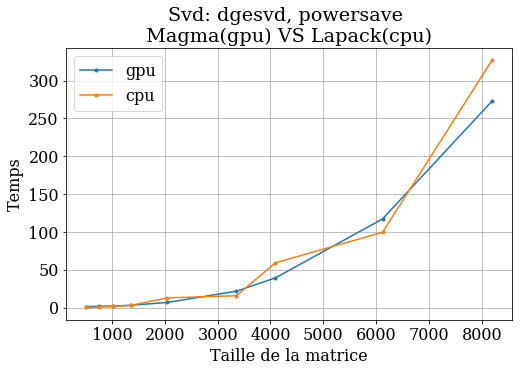

In [2]:
data_dgesvd_powersave = pandas.read_csv('magma/out-dgesvd-powersave.csv')
[N_dgesvd_powersave, 
 gpu_time_dgesvd_powersave, 
 cpu_time_dgesvd_powersave, 
 difference_dgesvd_powersave] = numpy.transpose(data_dgesvd_powersave.as_matrix(['N', 'gpu_time', \
                                                            'cpu_time', 'difference']))

pyplot.figure(figsize=(8,5));
pyplot.plot(N_dgesvd_powersave,gpu_time_dgesvd_powersave, '.-',label='gpu');
pyplot.plot(N_dgesvd_powersave,cpu_time_dgesvd_powersave, '.-',label='cpu');
pyplot.title("Svd: dgesvd, powersave \n Magma(gpu) VS Lapack(cpu) ");
pyplot.xlabel('Taille de la matrice');
pyplot.ylabel('Temps');
pyplot.legend(loc=2);
pyplot.grid();
pyplot.show()

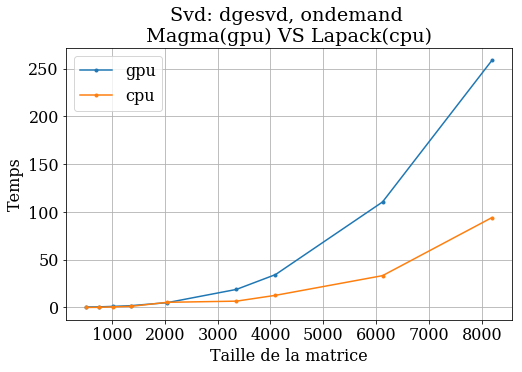

In [3]:
data_dgesvd_ondemand = pandas.read_csv('magma/out-dgesvd-ondemand.csv')
[N_dgesvd_ondemand, 
 gpu_time_dgesvd_ondemand, 
 cpu_time_dgesvd_ondemand, 
 difference_dgesvd_ondemand] = numpy.transpose(data_dgesvd_ondemand.as_matrix(['N', 'gpu_time', \
                                                            'cpu_time', 'difference']))

pyplot.figure(figsize=(8,5));
pyplot.plot(N_dgesvd_ondemand,gpu_time_dgesvd_ondemand, '.-',label='gpu');
pyplot.plot(N_dgesvd_ondemand,cpu_time_dgesvd_ondemand, '.-',label='cpu');
pyplot.title("Svd: dgesvd, ondemand \n Magma(gpu) VS Lapack(cpu) ");
pyplot.xlabel('Taille de la matrice');
pyplot.ylabel('Temps');
pyplot.legend(loc=2);
pyplot.grid();
pyplot.show()

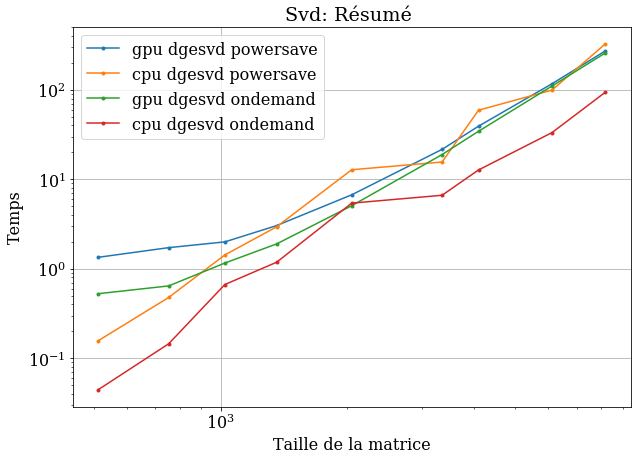

In [5]:
pyplot.figure(figsize=(10,7));
pyplot.loglog(N_dgesvd_powersave,gpu_time_dgesvd_powersave, '.-',label='gpu dgesvd powersave');
pyplot.loglog(N_dgesvd_powersave,cpu_time_dgesvd_powersave, '.-',label='cpu dgesvd powersave');
pyplot.loglog(N_dgesvd_ondemand,gpu_time_dgesvd_ondemand, '.-',label='gpu dgesvd ondemand');
pyplot.loglog(N_dgesvd_ondemand,cpu_time_dgesvd_ondemand, '.-',label='cpu dgesvd ondemand');
pyplot.title("Svd: Résumé ");
pyplot.xlabel('Taille de la matrice');
pyplot.ylabel('Temps');
pyplot.legend(loc=2);
pyplot.grid();
pyplot.show()

Nous voyons que le gpu n'exécute pas le code plus rapidement que le cpu sur ma machine. Les svd ne semblent pas être des algorithmes facilement parallélisable.